# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [3]:
# Importar a Base de Dados para o Python

import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

# Visualizar a Base de Dados e fazer os ajustes na Base de Dados

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
# Intalação de bibliotecas
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

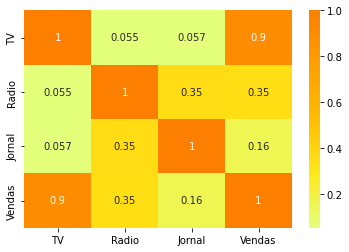

In [5]:
# Análise exploratória -> Entender como a base de dados está se comportando
# matplotilib e o seaborn - para criar gráfico

import seaborn as sns
import matplotlib.pyplot as plt


# Criar o gráfico
sns.heatmap(tabela.corr(), annot=True, cmap="Wistia")
# Link para mudar cor da tabela [https://seaborn.pydata.org/generated/seaborn.heatmap.html]

# Exibir o gráfico

plt.show()

# CORRELAÇÃO espaço de número de 0 a 1 [tabela.corr()]
# TV -> Vendas
# Radio -> Vendas
# Jornal -> Vendas

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [6]:
# Treino 70-90%
# Teste  10-30% (x, y, test_size=0.3)

# y -  quem você quer prever -> Vendas
# x - o resto d Base de Dados(quem você vai usar para fazer a previsão)

y = tabela["Vendas"]
x = tabela[["TV","Radio","Jornal"]]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)


#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [7]:
# Criar a Inteligência Artificial-IA e fazer as previsões

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [8]:
# Testar para ver qual inteligencia artificial será melhor 

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

# Imprimir o resultado da análise
print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684273
0.9648357865000515


#### Visualização Gráfica das Previsões

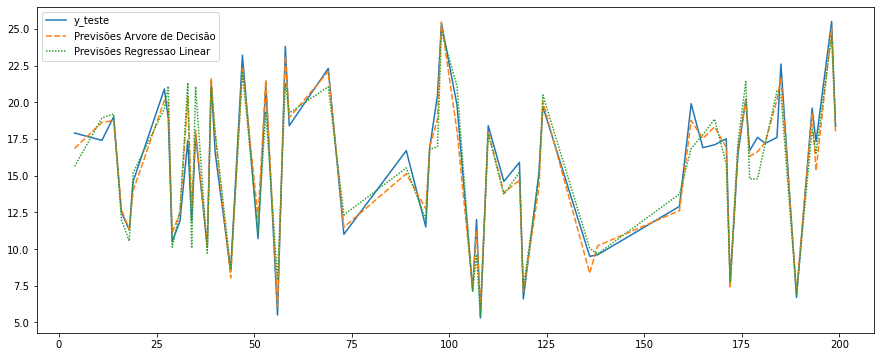

In [9]:
# Gráfico vazio - somente para teste

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsões Arvore de Decisão'] = previsao_arvoredecisao
tabela_auxiliar['Previsões Regressao Linear'] = previsao_regressaolinear

plt.figure(figsize=(15, 6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [10]:
# importando nova Base de Dados

novos = pd.read_csv("novos.csv")
display(novos)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [11]:
# Modelo de decisão vencedor foi a Árvore de Decisão

previsao = modelo_arvoredecisao.predict(novos)
print(previsao)

[ 7.439  8.721 19.995]


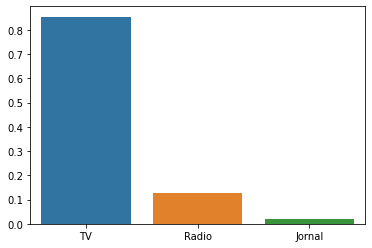

In [12]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

# Caso queira comparar Radio com Jornal
# print(df[["Radio", "Jornal"]].sum())